In [1]:
%matplotlib inline
import collections
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

In [2]:
# Author: Patrick 't Jong (hello@patricktjong.nl)


======================
Reading the graph TSV.
======================

Import the graph from the file.



In [4]:
import networkx as nx

with open("mentiongraph-larger.csv", 'rb') as data:
    next(data, '')   # skip a line
    G = nx.read_edgelist(data, delimiter=",", nodetype=str, data=[("weight", int),('date',str)], create_using=nx.DiGraph())

print "# of Nodes: ", G.number_of_nodes()
print "# of Edges: ", G.number_of_edges()

# of Nodes:  592656
# of Edges:  1016516


In [5]:
print "density of the network: ", nx.density(G)

density of the network:  2.89407366e-06


## Calculation of In/Outdegree.


Degree sequence calculation and plot.

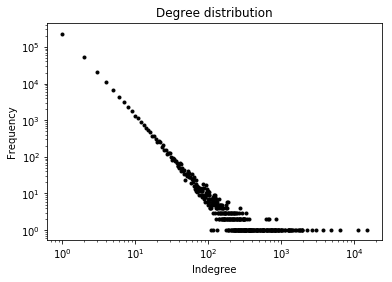

In [7]:
#InDegree sequence calculation
degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#Plot sequence as distribution
fig, ax = plt.subplots()
ax.plot(deg, cnt, 'k.')
ax.set(xlabel='Indegree', ylabel='Frequency',
       title='Degree distribution')
ax.set_yscale('log')
ax.set_xscale('log')
#ax.grid()
fig.savefig("l_indegree.png")
plt.show()

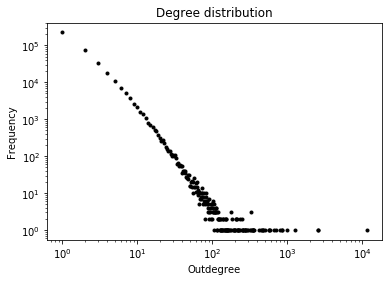

In [11]:
#OutDegree sequence calculation
degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#Plot sequence as distribution
fig, ax = plt.subplots()
ax.plot(deg, cnt, 'k.')
ax.set(xlabel='Outdegree', ylabel='Frequency',
       title='Degree distribution')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.grid()
fig.savefig("l_outdegree.png")
plt.show()

## Distance distribution
We use a 95% confindence level and 5% margin of error, the ideal sample size will be 384 nodes. We take this sample from the network and calculate the avg distance to calculate in order to plot the distance distribution.

Text(0,0.5,'Frequency')

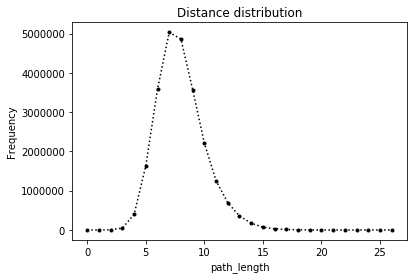

In [12]:
import random
k = 384
sampled_nodes = random.sample(G.nodes, k)
First = True

for node in sampled_nodes:
    path_length=nx.single_source_shortest_path_length(G, node)
    df = pd.DataFrame({'path_length':path_length.values()})
    if (First):
        dftotal = df.groupby(['path_length']).size()
        First = False
    else: 
        dftotal = dftotal.add(df.groupby(['path_length']).size(), fill_value=0)

ax = dftotal.plot(style='k.:',title='Distance distribution')
ax.set_ylabel("Frequency")

Text(0,0.5,'Frequency')

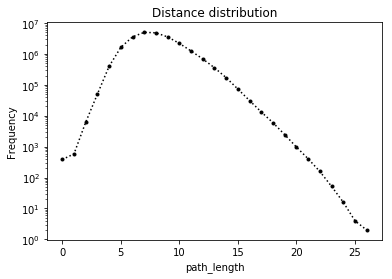

In [14]:
ax = dftotal.plot(style='k.:',title='Distance distribution', logy=True)
ax.set_ylabel("Frequency")

## Calculation average clustering coefficient.

The network is imported as undirected graph to allign with the calculation possibilities within NetworkX.


In [15]:
#Import as undirected graph
with open("mentiongraph-small.csv", 'rb') as data:
    next(data, '')   # skip a line
    GU = nx.read_edgelist(data, delimiter=",", nodetype=str, data=[("weight", int),('date',str)])
print(nx.average_clustering(GU))

0.0531863458991


## Giant Component, size and distance distribution

Largest weakly connected component of this network. If the giant component network exceeds 500 nodes we will take a sample.

In [27]:
#Use the undirected graph import
largest = max(nx.connected_component_subgraphs(GU), key=len)
print "# of nodes in the largest connected component: ", len(largest.nodes())
print "# of edges in the largest connected component: ", len(largest.edges())

# of nodes in the largest connected component:  39297
# of edges in the largest connected component:  53605


Text(0,0.5,'Frequency')

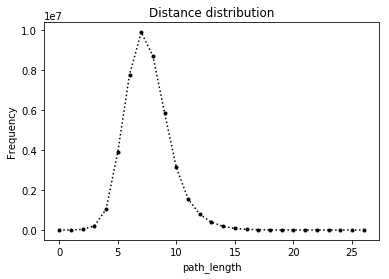

In [28]:
largest = max(nx.connected_component_subgraphs(GU), key=len)
largestsize = largest.number_of_nodes() 
k = largestsize
if (largestsize > 500):
    k = 384
sampled_nodes = random.sample(largest.nodes, k)
First = True

for node in sampled_nodes:
    path_length=nx.single_source_shortest_path_length(G, node)
    df = pd.DataFrame({'path_length':path_length.values()})
    if (First):
        dftotal = df.groupby(['path_length']).size()
        First = False
    else: 
        dftotal = dftotal.add(df.groupby(['path_length']).size(), fill_value=0)

ax = dftotal.plot(y='distance', style='k.:',title='Distance distribution')
ax.set_ylabel("Frequency")

Text(0,0.5,'Frequency')

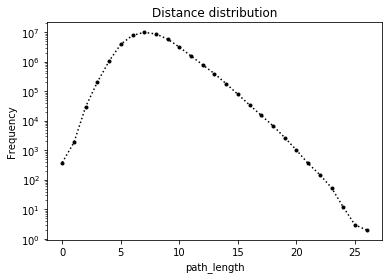

In [29]:
ax = dftotal.plot(y='distance', style='k.:',title='Distance distribution', logy=True)
ax.set_ylabel("Frequency")

## Calculation weak components.

Nodes/Links calculation in the largest stronly connected component.

In [21]:
print "# of weakly connected components:   ", len(list(nx.weakly_connected_components(G)))
print "# of strongly connected components: ", len(list(nx.strongly_connected_components(G)))

# of weakly connected components:    55236
# of strongly connected components:  517950


# TOP 20 users

In [22]:
import heapq
#Using the fasted way to full sort a unbounded dict with heapq
def printtop20(score):
    i = 0
    for user in heapq.nlargest(20, score, key=score.get):
        i += 1
        if len(user) < 10:
            space = "\t\t"
        else:
            space = "\t"
        print i, ": ", user, space, score[user]

## Betweenness centrality
Centrality in a graph based on shortest paths.<br> Betweenness centrality is a slow calculation. The algorithm used by networkx is O(VE) where V is the number of vertices and E the number of edges, this is going to take too long. A good alternative is to use an approximate measure. The standard betweenness measure considers every single pair of nodes and the paths between them. Networkx offers an alternative which uses a random sample of just k nodes and then finds shortest paths between those k nodes and all other nodes in the network. We will use the giant component as sample.

In [38]:
printtop20(nx.betweenness_centrality(largest, k=384))

1 :  theiphoneblog 	0.163587594293
2 :  tweetmeme 		0.152578448859
3 :  mashable 		0.143080153135
4 :  squarespace 	0.120438877635
5 :  tweetdeck 		0.119464181376
6 :  ryanbarr 		0.0992592302228
7 :  iphone_dev 	0.0810031186634
8 :  techcrunch 	0.0805247135592
9 :  scottbourne 	0.0682472155128
10 :  musclenerd 	0.0678112848263
11 :  iphoneincanada 	0.0668530680421
12 :  engadget 		0.0630426852614
13 :  scancafe 		0.0623751567064
14 :  tuaw 		0.0597342835664
15 :  gruber 		0.0560728520496
16 :  appletweets 	0.0525128025936
17 :  kevin_nealon 	0.0510338665218
18 :  jasonhiner 	0.0508393567067
19 :  rustyg 		0.050555754553
20 :  cmcadams 		0.0502266471308


## Closeness centrality
Calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph

In [24]:
printtop20(nx.closeness_centrality(largest))

1 :  techcrunch 	0.28858502252
2 :  tweetmeme 		0.267865195929
3 :  parislemon 	0.257893542785
4 :  iphone_dev 	0.257123134881
5 :  tuaw 		0.256053656661
6 :  joehewitt 		0.255515810116
7 :  taptaptap 		0.255311980855
8 :  scobleizer 	0.253242787511
9 :  theiphoneblog 	0.252273796906
10 :  arrington 		0.246347623994
11 :  tweetie 		0.244411574991
12 :  guykawasaki 	0.241191856743
13 :  sebastienpage 	0.240921282458
14 :  breakingnews 	0.239533945874
15 :  iphone_newsfeed 	0.237516436407
16 :  atebits 		0.237191732772
17 :  rww 		0.237042496584
18 :  krapps 		0.23693686571
19 :  robinwauters 	0.235231785244
20 :  mikebutcher 	0.234579805024


## Degree centrality 
Identify the most important vertices within a graph

In [31]:
printtop20(nx.degree_centrality(largest))

1 :  theiphoneblog 	0.062983509772
2 :  ryanbarr 		0.0455517100977
3 :  mashable 		0.032598737785
4 :  squarespace 	0.0270765472313
5 :  scottbourne 	0.0265930374593
6 :  scancafe 		0.0260840798046
7 :  iphone_dev 	0.0224450325733
8 :  tweetmeme 		0.0199002442997
9 :  tweetdeck 		0.0183733713355
10 :  kevinrose 		0.0133346905537
11 :  tomtom 		0.0108153501629
12 :  techcrunch 	0.0107135586319
13 :  iphoneincanada 	0.00687092833876
14 :  patrickaltoft 	0.00651465798046
15 :  quickpwn 		0.00636197068404
16 :  engadget 		0.00613293973941
17 :  tuaw 		0.00613293973941
18 :  tinteract 		0.00590390879479
19 :  musclenerd 	0.00577666938111
20 :  guardiantech 	0.00529315960912


## Eigenvector centrality
Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node i is

Ax = \lambda x

where A is the adjacency matrix of the graph G with eigenvalue \lambda. By virtue of the Perron–Frobenius theorem, there is a unique and positive solution if \lambda is the largest eigenvalue associated with the eigenvector of the adjacency matrix

In [32]:
printtop20(nx.eigenvector_centrality(largest))

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

## Load centrality
The load centrality of a node is the fraction of all shortest paths that pass through that node.

In [37]:
printtop20(nx.load_centrality(largest,cutoff=10))

1 :  theiphoneblog 	0.00914047092322
2 :  mashable 		0.00464098635851
3 :  ryanbarr 		0.00289813141453
4 :  squarespace 	0.00232498273233
5 :  iphone_dev 	0.00223183278986
6 :  tweetmeme 		0.00218767956801
7 :  tweetdeck 		0.00152484364368
8 :  iphoneincanada 	0.000791351365238
9 :  kevinrose 		0.000736032683096
10 :  scottbourne 	0.000711773638171
11 :  techcrunch 	0.000703559545086
12 :  scancafe 		0.000642939339691
13 :  macandiphone 	0.000463410075005
14 :  allthingsiphone 	0.000440225882924
15 :  musclenerd 	0.000379258997611
16 :  trackle 		0.00028369731418
17 :  igroaniphone 	0.000248664777379
18 :  tuaw 		0.000240649975563
19 :  engadget 		0.000208186400936
20 :  tomtom 		0.000203312237001
